# ロジスティック回帰

**ロジスティック回帰**とは、"確率"について回帰分析を行いたいときに有効です。
ロジスティック回帰を用いれば、必ず予想結果が0から1の範囲内に収まります。
ですから、確率を予測・分析したいときによく用いられます。

## データセット
---
今回は、目的変数(Y)を品質、説明変数(X)をXXXとして解析を行う

データはUCI Machine Learning Repository（Wine Quality Data Set）から入手できます。

このデータは、ポルトガルワインの一種である、西北端の大西洋に面するミーニョ(Minho)地方で作られたヴィーニョ・ヴェルデ（Vinho Verde）を測定したデータから構成されています。

データセットは赤ワインと白ワインの２種類のデータ群から構成されており、ワイン（銘柄名は不明）ごとに測定された１１種類の成分データとそのワインの味を評価したグレード（数値）からなっています。なお、グレードは３人以上のワイン査定士が評価した結果の中間値です（グレードは０（とてもまずい）から１０（絶品）まで）（詳細はCortezら(2009)を参照してください）。
データサイズはそれぞれ1599、4898です。変数一覧はつぎのとおりです。

## 分析環境構築

In [160]:
# 分析に必要なライブラリをインポート
import pandas as pd
import numpy as np

import seaborn as sns

## データセット読み込み

In [4]:
# 読み込んだデータセットをdfという名前のデータフレームに代入する
df = pd.read_csv("../dataset/winequality-red.csv")
# データの先頭行を表示する
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


- 列ごとに表示されていないので、読み込み方を工夫する必要がある
- ;（セミコロン）で列に分割することができそうだ
- sep=';'を追記して、列に分割してみよう

In [162]:
# データセットを読み込む
df = pd.read_csv("../dataset/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- データテーブルとして綺麗に列を分割して表示されている- データテーブルとして綺麗に列を分割して表示されている

## 列名を調べる

- 下記のリンクをクリックすると、公開用のスプレッドシートに飛びます
- [スプレッドシートで翻訳関数を使ってみよう](https://docs.google.com/spreadsheets/d/1q2uugJ5_jtUcJeI8nHAX90Aa3TastjLwYW9NySmQ6ag/edit?usp=sharing)

| 英語 | google翻訳 | 修正した日本語訳 |
|:-----------|------------:|:------------:|
|  fixed acidity | 固定酸度 | This |
| volatile acidity | 揮発性の酸味 | This |
|  citric acid | クエン酸 | This |
|  residual sugar | 残留糖 | This |
|  chlorides | 塩化物 | This |
|  free sulfur dioxide | 遊離二酸化硫黄 | This |
|  total sulfur dioxide | 総二酸化硫黄 | This |
|  density | 密度 | This |
|  pH | pH | This |
|  sulphates | 硫酸塩 | This |
| alcohol | アルコール | This |
| quality | 品質 | This |

## 集計

### データ量を把握する（shape）

In [7]:
df.shape

(1599, 12)

- およそ1600件のデータである
- 1599行, 12列のデータテーブル

### データ個数を調べる（count）

In [8]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

- 今回は欠損はなさそう
- 異常値が入っていないかは注意して進める

## 記述統計量（describe）

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- 今回は、ワインの美味しさを「品質スコア」と定義する
- 「品質スコア」はデータテーブルでは、「quality」に格納されている
- 「quality」の最大値と最小値はそれぞれ8と3である
- 一般的に最小値3, 最大値8の選択肢はなさそうだ
- なので、0~10段階の選択肢があると推測する
- 「quality」の平均値は約5.64である
- 0〜10の10段階で、平均が5.6であるなら、「quality」の値は正しそうだ
- 「quality」の標準偏差は約0.81である
- 後述

## データ型

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- 64bitの浮動小数点数なので数値
- 数値データで構成されているため、モデルは作りやすいと予想できる

## 可視化

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

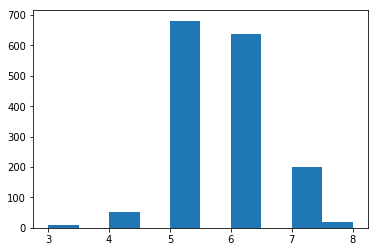

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
# 品質のヒストグラムを描画
plt.hist(df.quality)

In [34]:
plt.scatter（df.quality）

SyntaxError: invalid character in identifier (<ipython-input-34-82281d9c5795>, line 1)

In [164]:
# 関数を作ります。
def delicious_score(x):
    # もしqualityが7以上であれば美味しい(1)
    if x >= 7:
        return 1
    # 7以上でないなれば、美味しくない(0)
    else:
        return 0

# applyを使って、新しい列用のデータを作りましょう。
df['delicious'] = df['quality'].apply(delicious_score)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,delicious
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
delicious                  0.120061         -0.270712     0.214716   

                   

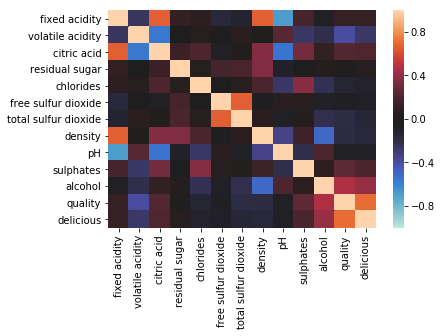

In [165]:
df_corr = df.corr()
#print(df_corr)
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

## 正規化
---
最小値0, 最大値1になるようにデータを正規化する

### 最小0最大1にスケール変換する

In [153]:
# データ前処理に必要なライブラリ
from sklearn import preprocessing

# インスタンスの作成
mmscaler = preprocessing.MinMaxScaler() 

# 説明変数の最大・最小を計算
mmscaler.fit(df)
df_mms = pd.DataFrame(mmscaler.transform(df))
df_mms.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205,0.135710
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514,0.342587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000,0.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000,0.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
# スケール変換によって変わってしまった列名を直す
df = df_mms.rename(columns={
    0: 'fixed acidity', 
    1: 'volatile acidity', 
    2: 'citric acid', 
    3: 'residual sugar', 
    4: 'chlorides', 
    5: 'free sulfur dioxide', 
    6: 'total sulfur dioxide', 
    7: 'density', 
    8: 'pH', 
    9: 'sulphates', 
    10: 'alcohol', 
    11: 'quality', 
    12: 'delicious' 
})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,delicious
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0


In [155]:
df.groupby('delicious').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
delicious,,,,,,,,,,,,
0.0,0.321843,0.292481,0.254407,0.110419,0.129016,0.213693,0.149420,0.498470,0.452454,0.188475,0.284775,0.481766
1.0,0.375841,0.195568,0.376498,0.123887,0.106699,0.182839,0.102083,0.437612,0.432127,0.247579,0.479700,0.816590


## 相関係数

In [156]:
df2 = df.groupby('delicious').mean()
cf_corr = df2.corr()
print(cf_corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                   1.0              -1.0          1.0   
volatile acidity               -1.0               1.0         -1.0   
citric acid                     1.0              -1.0          1.0   
residual sugar                  1.0              -1.0          1.0   
chlorides                      -1.0               1.0         -1.0   
free sulfur dioxide            -1.0               1.0         -1.0   
total sulfur dioxide           -1.0               1.0         -1.0   
density                        -1.0               1.0         -1.0   
pH                             -1.0               1.0         -1.0   
sulphates                       1.0              -1.0          1.0   
alcohol                         1.0              -1.0          1.0   
quality                         1.0              -1.0          1.0   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [131]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,delicious
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205,0.135710
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514,0.342587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000,0.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000,0.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 学習データセット作成

### データ分割

In [132]:
# 教師データの作成
Y = df2["delicious"]
X = df2.drop(["quality", "delicious"], axis=1)

In [174]:
# ロジスティク回帰
from sklearn.linear_model import LogisticRegression
# 交差検証
from sklearn.cross_validation import train_test_split
# インスタンス作成
log_model = LogisticRegression()

# データを分割します。テストが全体の25%になるようにします。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=3)

# データを使って学習します。
log_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
306,0.265487,0.342466,0.32,0.089041,0.116861,0.084507,0.169611,0.479442,0.488189,0.113772,0.153846
940,0.442478,0.143836,0.52,0.089041,0.103506,0.169014,0.067138,0.368576,0.488189,0.257485,0.615385
129,0.132743,0.178082,0.15,0.061644,0.100167,0.070423,0.045936,0.398678,0.535433,0.143713,0.153846
395,0.654867,0.171233,0.76,0.226027,0.090150,0.084507,0.113074,0.758443,0.377953,0.161677,0.707692
1462,0.194690,0.356164,0.03,0.095890,0.105175,0.183099,0.088339,0.395007,0.488189,0.149701,0.307692
326,0.619469,0.280822,0.66,0.188356,0.181970,0.070423,0.028269,0.567548,0.244094,0.245509,0.476923
191,0.159292,0.171233,0.25,0.068493,0.103506,0.281690,0.151943,0.538179,0.653543,0.173653,0.215385
722,0.265487,0.205479,0.08,0.123288,0.120200,0.197183,0.148410,0.494126,0.370079,0.155689,0.246154
1564,0.230088,0.393836,0.13,0.075342,0.106845,0.154930,0.049470,0.395742,0.433071,0.125749,0.261538
1064,0.318584,0.424658,0.09,0.075342,0.091820,0.056338,0.014134,0.301762,0.425197,0.143713,0.523077


In [177]:
#テストデータを使って、モデルの精度を確認してみましょう。
# 精度を計算するのに便利なツールです。
from sklearn import metrics

# テストデータを予測します。
Y_pred = log_model.predict(X_test)

# 精度を計算してみましょう。
print(metrics.accuracy_score(Y_test,Y_pred))

0.885


In [178]:
# pickleのインポート
import pickle
#pickleでモデルを保存する
# モデルを保存する
filename = 'nullsuckAi_01model.sav'
pickle.dump(log_model, open(filename, 'wb'))

In [169]:
print("coefficient = ", log_model.coef_)
print("intercept = ", log_model.intercept_)

coefficient =  [[ 0.84363472 -2.44686804  1.01923795  0.88409514 -1.16533792 -0.17983164
  -2.38290585 -1.5781702  -0.64466227  2.51644617  3.9712681 ]]
intercept =  [-2.37973615]


In [170]:
probs = log_model.predict_proba(X_test)
print(probs)

[[0.96534504 0.03465496]
 [0.86819738 0.13180262]
 [0.8669508  0.1330492 ]
 [0.71050778 0.28949222]
 [0.97193143 0.02806857]
 [0.95117874 0.04882126]
 [0.98358481 0.01641519]
 [0.75215535 0.24784465]
 [0.93942925 0.06057075]
 [0.86142932 0.13857068]
 [0.89607219 0.10392781]
 [0.96668545 0.03331455]
 [0.96030174 0.03969826]
 [0.94918282 0.05081718]
 [0.62409231 0.37590769]
 [0.97804993 0.02195007]
 [0.80274409 0.19725591]
 [0.96011119 0.03988881]
 [0.77178893 0.22821107]
 [0.69259167 0.30740833]
 [0.5999505  0.4000495 ]
 [0.92715087 0.07284913]
 [0.88495363 0.11504637]
 [0.94835569 0.05164431]
 [0.94501236 0.05498764]
 [0.94983135 0.05016865]
 [0.95604879 0.04395121]
 [0.54003575 0.45996425]
 [0.78222951 0.21777049]
 [0.89128729 0.10871271]
 [0.80432416 0.19567584]
 [0.70148172 0.29851828]
 [0.97258606 0.02741394]
 [0.89600484 0.10399516]
 [0.95800066 0.04199934]
 [0.71117621 0.28882379]
 [0.46091212 0.53908788]
 [0.97648114 0.02351886]
 [0.9519105  0.0480895 ]
 [0.89600484 0.10399516]


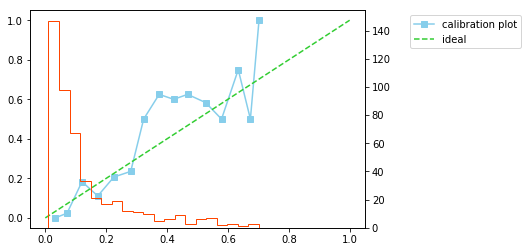

In [171]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

prob = log_model.predict_proba(X_test)[:, 1] # 目的変数が1である確率を予測
prob_true, prob_pred = calibration_curve(y_true=Y_test, y_prob=prob, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue') # キャリプレーションプロットを作成
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen') # 45度線をプロット
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx() # 2軸を追加
ax2.hist(prob, bins=20, histtype='step', color='orangered') # スコアのヒストグラムも併せてプロット
plt.show()

In [149]:
sample_wine1 = pd.DataFrame({
    'fixed acidity': [0.3],
    'volatile acidity': [0],
    'citric acid': [0],
    'residual sugar': [1],
    'chlorides': [0],
    'free sulfur dioxide': [0],
    'total sulfur dioxide': [0],
    'density': [0],
    'pH': [0],
    'sulphates': [0],
    'alcohol': [1] 
})

In [151]:
sample_wine2 = pd.DataFrame({
    'fixed acidity': [0],
    'volatile acidity': [0],
    'citric acid': [0],
    'residual sugar': [0],
    'chlorides': [0],
    'free sulfur dioxide': [0],
    'total sulfur dioxide': [0],
    'density': [0],
    'pH': [0],
    'sulphates': [0],
    'alcohol': [0] 
})

In [175]:
spot_predict = log_model.predict_proba(sample_wine1)[0][1] #log_modelが分類される確率を予測
print('美味しいワインに分類される可能性は {:.2f} % です。'.format(spot_predict * 100))

美味しいワインに分類される可能性は 94.46 % です。


In [176]:
spot_predict = log_model.predict_proba(sample_wine2)[0][1] #log_modelが分類される確率を予測
print('美味しいワインに分類される可能性は {:.2f} % です。'.format(spot_predict * 100))

美味しいワインに分類される可能性は 8.63 % です。


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
6,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
5,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
7,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5


## ロジット関数
オッズ比の対数（対数オッズ）

### 目的変数: quality（品質）

### 説明変数: 11項目
---
- あああ

### データ分割

## 偏回帰係数を求める
- 最小二乗法
- 最尤法（ロジット関数）

### 回帰係数

### 標準誤差

### z値

### p値

### オッズ比とオッズ比の95%を信頼区間を出力

### AICと要素数を抽出

# モデリング

## 訓練・学習
---


### .fitによる学習

### .scoreによる予測精度評価

### .predict

### .decision_function（決定関数）

ロジスティック回帰では識別境界からどれくらい離れているかが重要です。つまり、識別境界から離れているほど、分類があたっている確率が高く、識別境界に近いほど分類があいまいということです。
サンプルデータと識別境界との距離を求めるのに決定関数decision_function()

絶対値が大きければ大きいほど、境界から離れているということになります。
この値を小さい方からソートしてプロットしてみると、下のようになります。

https://tech-clips.com/wp-content/uploads/2017/03/p3.4.png

### シグモイド関数どこかできれたい

## 説明変数の影響度を比較する
- オッズ比

## 説明変数の選択
- ステップワイズ法で説明変数の取捨選択を行う